## 0.1  Final Project Submission

Please fill out:


Student name: Monica Haderthauer and Henry Costello

Student pace: full time

Scheduled project review date/time: Friday, 4/22

Instructor name: Praveen Gowtham

## Import 

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [71]:
pd.set_option('display.max_columns', 500)

In [72]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [73]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Column Values

In [74]:
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

In [75]:
# delete MartitalStatus, Gender, Age? Protected classes
#keep monthly income, drop rate columns 

In [76]:
for col in df:
    print(df[col].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

Seaching for outliers in numeric columns

<ipython-input-77-dcaacaf39c84>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


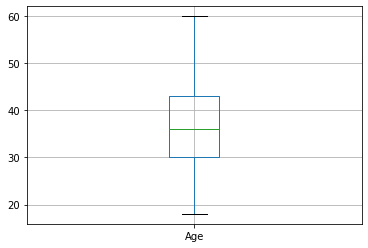

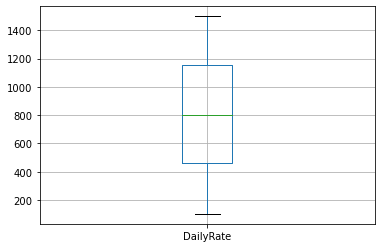

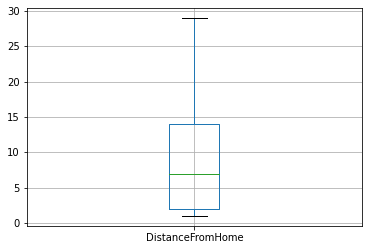

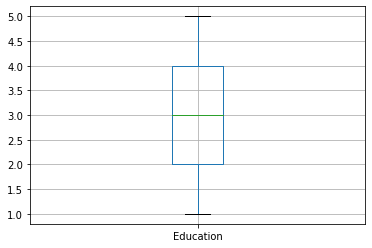

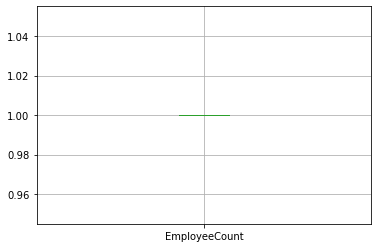

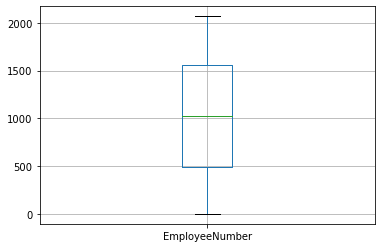

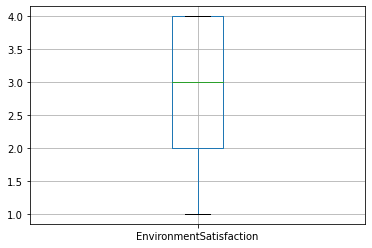

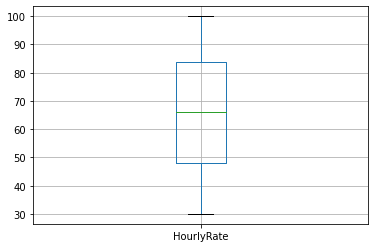

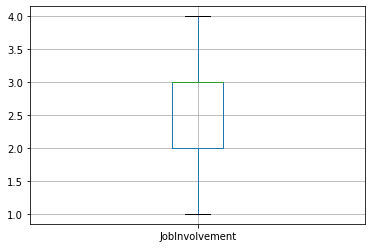

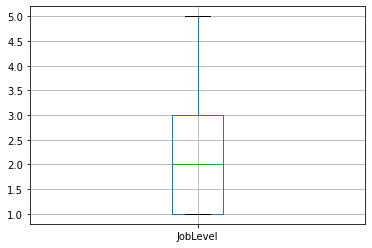

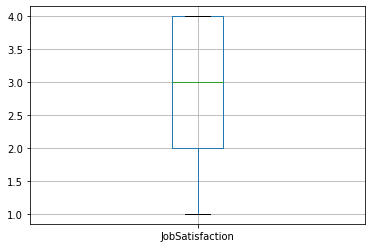

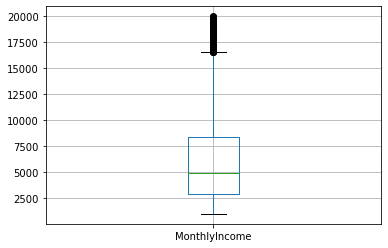

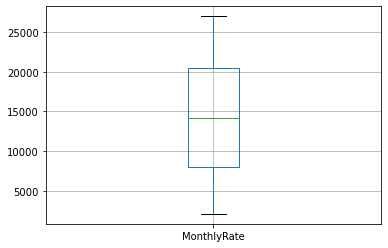

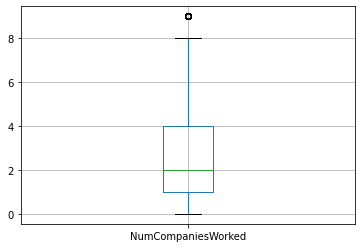

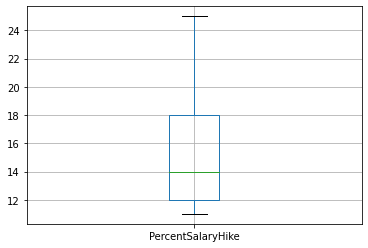

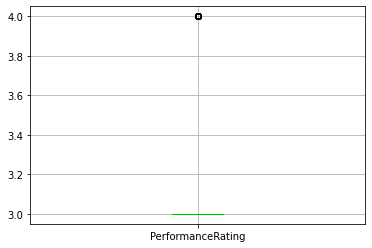

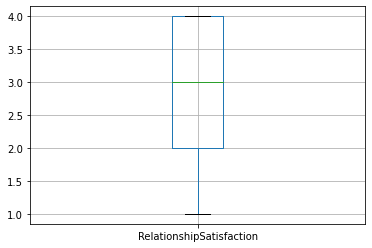

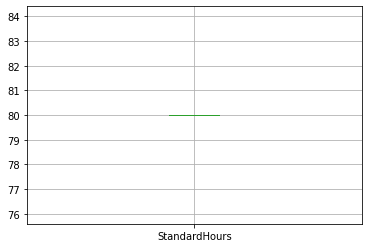

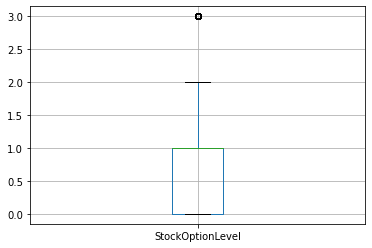

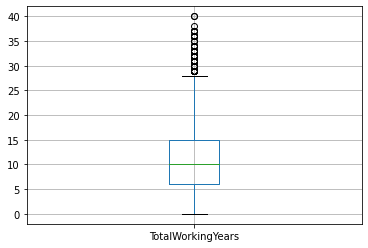

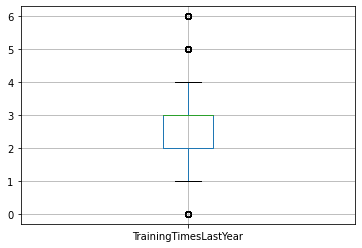

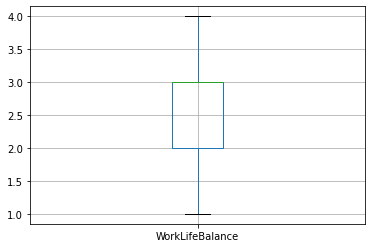

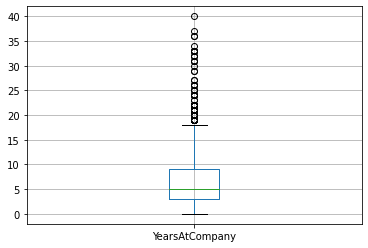

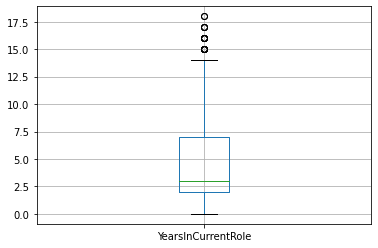

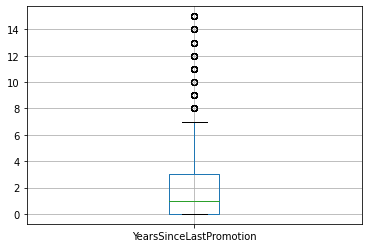

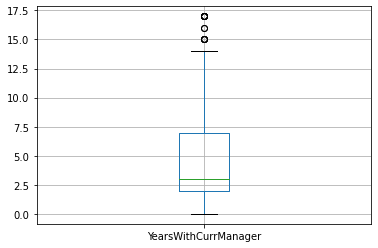

In [77]:
numeric_cols = df.select_dtypes(include=np.number)

for column in numeric_cols:
    plt.figure()
    df.boxplot([column])

In [78]:
#deleting outliers
df = df[df['MonthlyIncome'] < 12000]
df = df[df['YearsSinceLastPromotion'] < 6]
df = df[df['YearsWithCurrManager'] < 15]
df = df[df['TotalWorkingYears'] < 21]
df = df[df['TrainingTimesLastYear'] < 5]
df = df[df['YearsAtCompany'] < 17]
df = df[df['YearsInCurrentRole'] < 15]
df = df[df['JobLevel'] < 3.5]
df = df[df['Age'] < 52]

df['Age'].value_counts()

34    59
35    54
29    53
31    52
32    48
36    47
30    45
38    44
33    40
28    39
27    37
37    34
40    30
26    28
24    24
45    24
25    22
39    21
42    21
41    20
44    17
43    16
46    15
23    13
47    12
22    12
49    11
50     9
20     9
21     9
19     8
51     8
18     7
48     6
Name: Age, dtype: int64

In [79]:
cleaned_df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MaritalStatus', 'MonthlyRate',
                              'PerformanceRating'])

In [80]:
df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MaritalStatus', 'MonthlyRate',
                              'PerformanceRating'])
numeric_cols = df.select_dtypes(include=np.number)

<ipython-input-81-6763f38c2c78>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


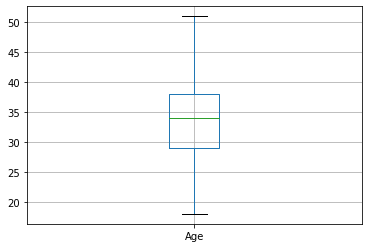

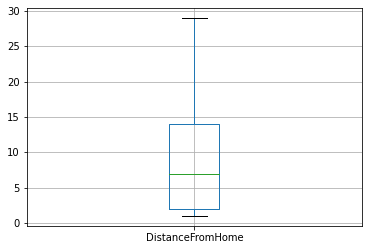

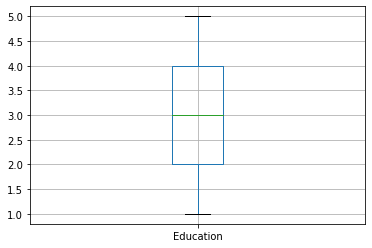

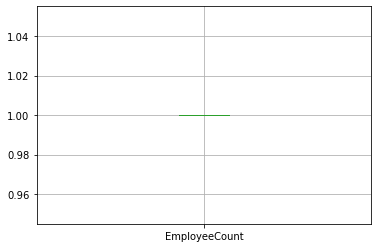

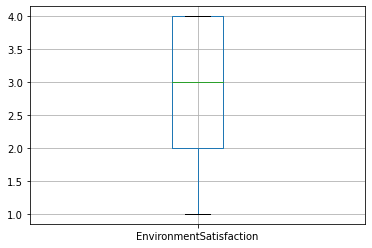

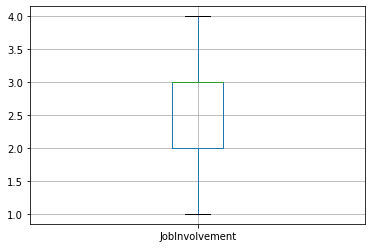

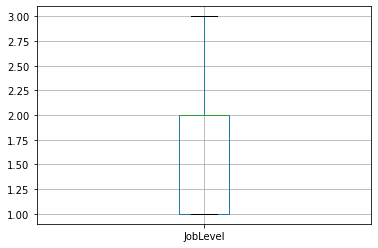

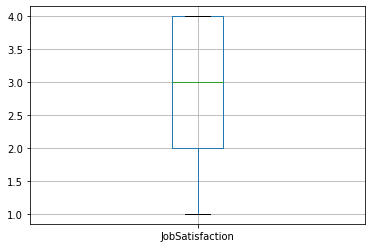

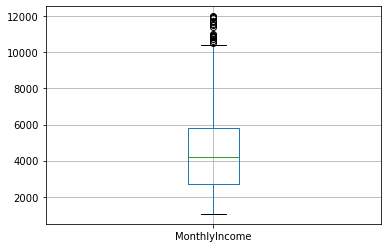

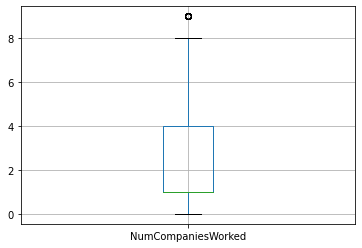

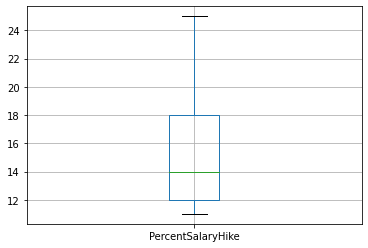

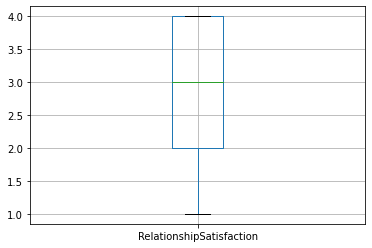

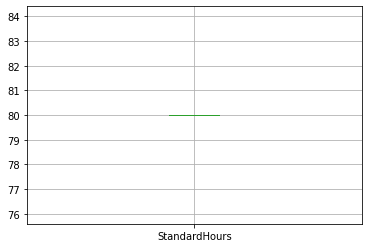

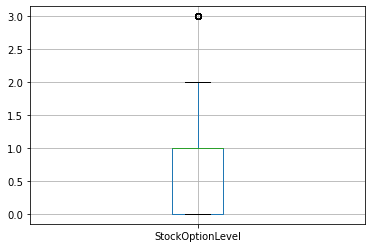

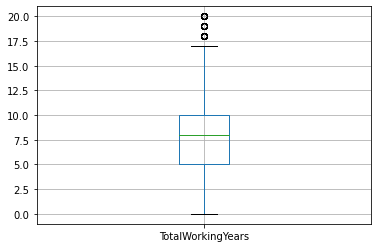

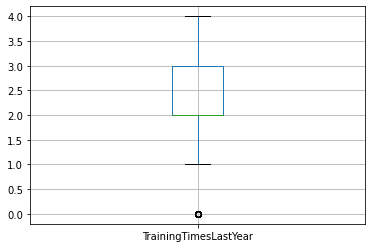

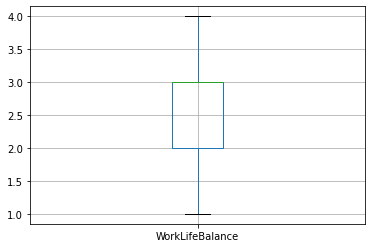

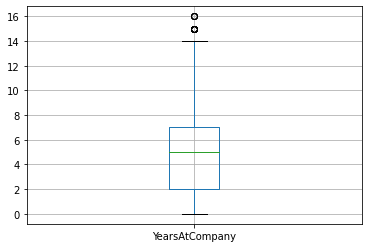

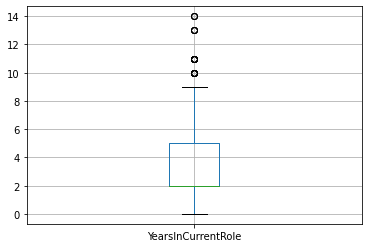

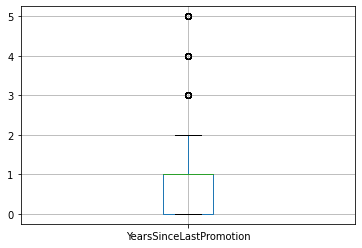

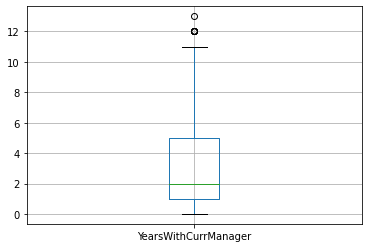

In [81]:
for column in numeric_cols:
    plt.figure()
    df.boxplot([column])

In [82]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x =='No' else 1)

In [83]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,5993,8,Y,Yes,11,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,2,2,Research Scientist,2,5130,1,Y,No,23,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,2,1,Laboratory Technician,3,2090,6,Y,Yes,15,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,3,1,Research Scientist,3,2909,1,Y,Yes,11,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,3,1,Laboratory Technician,2,3468,9,Y,No,12,4,80,1,6,3,3,2,2,2,2


In [84]:
df['Attrition'].value_counts()
#attrition = no is 1233, much higher rate than turnover of 237 employees
#after removing outliers- 724 stayed and 170 have left

0    724
1    170
Name: Attrition, dtype: int64

In [85]:
df['EmployeeCount'].unique()

array([1])

In [86]:
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])
#dropping these columns because they each only contain one unique value and will not help analysis

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       894 non-null    int64 
 1   Attrition                 894 non-null    int64 
 2   BusinessTravel            894 non-null    object
 3   Department                894 non-null    object
 4   DistanceFromHome          894 non-null    int64 
 5   Education                 894 non-null    int64 
 6   EducationField            894 non-null    object
 7   EnvironmentSatisfaction   894 non-null    int64 
 8   Gender                    894 non-null    object
 9   JobInvolvement            894 non-null    int64 
 10  JobLevel                  894 non-null    int64 
 11  JobRole                   894 non-null    object
 12  JobSatisfaction           894 non-null    int64 
 13  MonthlyIncome             894 non-null    int64 
 14  NumCompaniesWorked       

In [88]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [89]:
#numeric_columns = df.select_dtypes(include=['int64'])
#numeric_columns

## Correlation

In [90]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.100144
NumCompaniesWorked          0.040615
PercentSalaryHike          -0.001916
TrainingTimesLastYear      -0.005653
Education                  -0.024732
WorkLifeBalance            -0.067128
RelationshipSatisfaction   -0.069594
YearsSinceLastPromotion    -0.085637
JobSatisfaction            -0.131776
JobInvolvement             -0.139988
StockOptionLevel           -0.143197
EnvironmentSatisfaction    -0.153194
Age                        -0.159824
JobLevel                   -0.163225
MonthlyIncome              -0.163912
TotalWorkingYears          -0.198990
YearsWithCurrManager       -0.199691
YearsInCurrentRole         -0.206947
YearsAtCompany             -0.228789
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

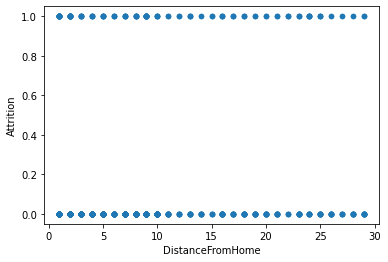

In [91]:
#df.plot.scatter('PerformanceRating', 'Attrition')
df.plot.scatter('DistanceFromHome','Attrition')

## Encoding 

In [92]:
numeric_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include=['object'])

In [93]:
#df = df.astype({"Name":'category', "Age":'int64'})
#df = df.astype({'BusinessTravel':'category', 'Department':'category', 'EducationField':'category',
             #  'Gender': 'category', 'JobRole':'category', 'MaritalStatus':'category', 'OverTime':'category'})

In [94]:
encodedcats = pd.get_dummies(categorical_cols)
encodecats = pd.concat([encodedcats, numeric_cols], axis = 1)
encodecats.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.253088
JobRole_Sales Representative         0.172782
BusinessTravel_Travel_Frequently     0.125680
DistanceFromHome                     0.100144
JobRole_Laboratory Technician        0.098156
EducationField_Technical Degree      0.080706
Department_Sales                     0.064890
EducationField_Human Resources       0.056587
EducationField_Marketing             0.046440
NumCompaniesWorked                   0.040615
JobRole_Human Resources              0.031849
Department_Human Resources           0.031849
Gender_Male                          0.012577
PercentSalaryHike                   -0.001916
TrainingTimesLastYear               -0.005653
Gender_Female                       -0.012577
JobRole_Manager                     -0.022945
Education                           -0.024732
EducationField_Other                -0.025085
EducationField_Medical              -0.025543
JobRole_Sales Executive           

In [95]:
df.select_dtypes(include = np.number, exclude = object).corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159824,0.003337,0.249433,0.026977,0.025660,0.290584,0.011497,0.272210,0.284523,-0.003581,0.030153,0.086428,0.538131,0.016300,0.019090,0.161990,0.137470,0.068139,0.137493
Attrition,-0.159824,1.000000,0.100144,-0.024732,-0.153194,-0.139988,-0.163225,-0.131776,-0.163912,0.040615,-0.001916,-0.069594,-0.143197,-0.198990,-0.005653,-0.067128,-0.228789,-0.206947,-0.085637,-0.199691
DistanceFromHome,0.003337,0.100144,1.000000,-0.022712,0.003570,-0.027019,0.086554,0.006918,0.060441,-0.011832,0.025269,-0.013540,0.062755,0.055537,-0.032302,-0.043504,0.022877,0.026011,-0.019580,0.015743
Education,0.249433,-0.024732,-0.022712,1.000000,-0.036325,0.046953,0.114041,-0.014496,0.108614,0.139804,-0.003965,0.020663,0.049585,0.178136,0.026845,0.032027,0.082947,0.090632,0.015290,0.052707
EnvironmentSatisfaction,0.026977,-0.153194,0.003570,-0.036325,1.000000,0.024409,0.009160,-0.033890,-0.009633,0.009264,-0.014896,0.039190,0.051344,-0.023578,0.006963,0.006078,0.026471,0.049759,0.057499,0.003232
JobInvolvement,0.025660,-0.139988,-0.027019,0.046953,0.024409,1.000000,-0.012258,-0.003312,-0.027483,0.041882,-0.012055,0.043051,-0.016718,0.017607,-0.007513,0.014220,0.026471,0.002324,-0.016027,0.039980
JobLevel,0.290584,-0.163225,0.086554,0.114041,0.009160,-0.012258,1.000000,-0.006890,0.867600,0.108751,-0.026522,-0.011553,0.051369,0.535992,-0.008727,0.041314,0.418936,0.370094,0.105725,0.376157
JobSatisfaction,0.011497,-0.131776,0.006918,-0.014496,-0.033890,-0.003312,-0.006890,1.000000,-0.005587,-0.027168,-0.000374,0.044826,0.015044,-0.026555,-0.046483,-0.032435,0.046156,0.026826,0.052573,0.015854
MonthlyIncome,0.272210,-0.163912,0.060441,0.108614,-0.009633,-0.027483,0.867600,-0.005587,1.000000,0.122333,-0.014817,0.001348,0.034576,0.508212,-0.031944,0.025180,0.389918,0.346276,0.111337,0.351866
NumCompaniesWorked,0.284523,0.040615,-0.011832,0.139804,0.009264,0.041882,0.108751,-0.027168,0.122333,1.000000,-0.005360,0.008212,0.054164,0.308817,-0.002342,0.022900,-0.141324,-0.098858,-0.043027,-0.098604


## Heatmap

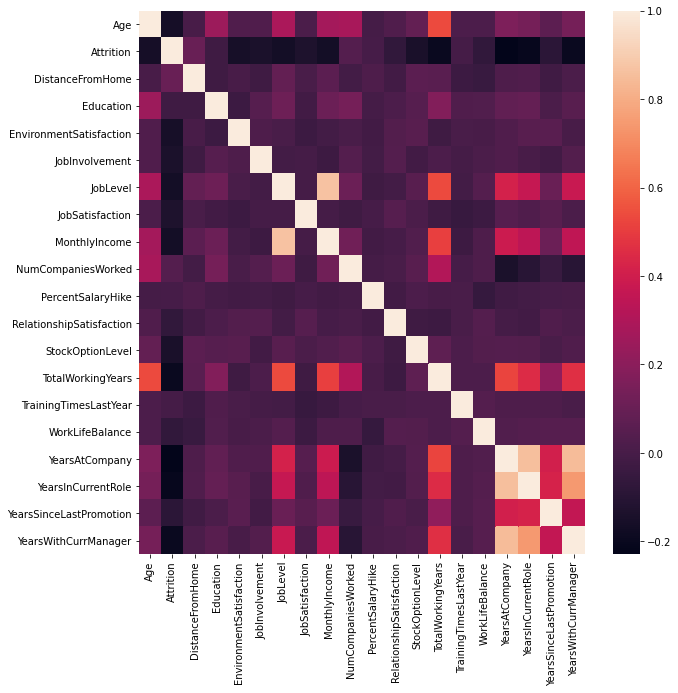

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include = np.number, exclude = object).corr());

In [97]:
#highly correlated job level and monthly income, 

In [98]:
#df[['EmployeeCount']].std()

#if standard deviation is 0, drop them from project because it's a contant 

In [99]:
encodecats.corr()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel_Non-Travel,1.000000,-0.170719,-0.522815,-0.012980,0.008404,-0.002584,-0.005549,0.008466,-0.023224,-0.027365,-0.009714,0.064787,-0.062198,0.062198,0.009082,-0.012980,-0.009635,-0.016328,-0.015246,0.082862,0.006146,0.025843,-0.044169,0.037800,-0.037800,0.025613,-0.083844,0.025838,-0.006983,-0.015335,-0.017262,0.037335,-0.028538,0.007878,0.038980,0.037708,-0.004252,0.052007,-0.011426,-0.064425,0.030063,0.023113,0.036532,0.007408,0.054648
BusinessTravel_Travel_Frequently,-0.170719,1.000000,-0.750678,0.001813,-0.016451,0.016225,0.034655,0.018096,-0.021709,0.001292,-0.017082,-0.012989,0.015369,-0.015369,0.004386,0.001813,0.012346,-0.023444,-0.001210,-0.047046,-0.020369,-0.018351,0.059562,-0.016195,0.016195,0.024733,0.125680,-0.015093,-0.019235,-0.023106,0.028117,-0.007033,0.055823,-0.016415,-0.042345,-0.027620,0.060903,-0.012126,0.003960,0.036669,0.029447,0.025956,0.029191,0.021150,0.006213
BusinessTravel_Travel_Rarely,-0.522815,-0.750678,1.000000,0.007135,0.008597,-0.012304,-0.026261,-0.021333,0.034353,0.017231,0.021291,-0.032203,0.028408,-0.028408,-0.009884,0.007135,-0.004220,0.031230,0.011270,-0.014858,0.013502,-0.001452,-0.021914,-0.011334,0.011334,-0.038572,-0.052514,-0.004266,0.021323,0.030272,-0.012751,-0.018949,-0.029160,0.008920,0.010498,-0.001388,-0.049840,-0.024381,0.004235,0.011474,-0.045634,-0.037953,-0.049749,-0.023265,-0.042017
Department_Human Resources,-0.012980,0.001813,0.007135,1.000000,-0.307594,-0.153855,0.673675,-0.081654,-0.083533,-0.067595,0.007197,-0.020764,-0.007533,0.007533,-0.066581,1.000000,-0.119203,-0.010901,-0.075592,-0.021877,-0.131136,-0.126374,-0.066057,0.012801,-0.012801,0.015518,0.031849,-0.023870,0.023166,-0.023338,0.004137,-0.062097,-0.039621,-0.056899,0.026460,-0.016175,0.038548,-0.015991,-0.017184,-0.002686,0.041802,-0.008116,-0.033557,0.033179,-0.013982
Department_Research & Development,0.008404,-0.016451,0.008597,-0.307594,1.000000,-0.892864,-0.207218,0.154262,-0.484761,0.188537,0.049666,0.046616,-0.042428,0.042428,0.216458,-0.307594,0.387536,-0.013911,0.245753,0.071122,0.426329,-0.733384,-0.383344,0.011720,-0.011720,0.008507,-0.077003,0.005612,-0.057733,0.021797,0.036281,-0.253552,0.006261,-0.205432,0.031885,0.060515,0.004934,-0.008163,0.005635,-0.070426,-0.079668,-0.040776,-0.045015,-0.010075,-0.031464
Department_Sales,-0.002584,0.016225,-0.012304,-0.153855,-0.892864,1.000000,-0.103648,-0.121548,0.542929,-0.163793,-0.054981,-0.038581,0.047624,-0.047624,-0.193267,-0.153855,-0.346016,0.019606,-0.219424,-0.063502,-0.380654,0.821384,0.429343,-0.018228,0.018228,-0.016179,0.064890,0.005469,0.048988,-0.011590,-0.039633,0.292688,0.012250,0.240257,-0.045634,-0.055186,-0.023367,0.016045,0.002281,0.074404,0.062946,0.046185,0.062627,-0.005241,0.039290
EducationField_Human Resources,-0.005549,0.034655,-0.026261,0.673675,-0.207218,-0.103648,1.000000,-0.131836,-0.056274,-0.098783,-0.038935,-0.049617,-0.042779,0.042779,-0.044854,0.673675,-0.080304,-0.007344,-0.050924,-0.014738,-0.088343,-0.085135,-0.044501,0.002126,-0.002126,-0.001541,0.056587,-0.022030,0

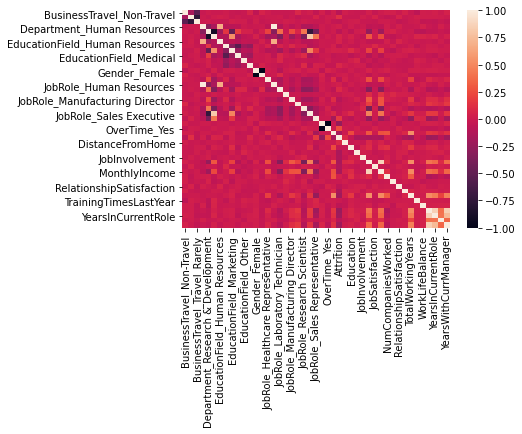

In [100]:
sns.heatmap(encodecats.corr());

In [101]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,4,1,6,3,3,2,2,2,2


In [102]:
df['Attrition'].value_counts()

0    724
1    170
Name: Attrition, dtype: int64

## Train Test Split

In [103]:
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [104]:
y = cleaned_df['Attrition']
X = cleaned_df.drop(columns=['Attrition'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Encode Training Set

In [106]:
train_numeric_cols = X_train.select_dtypes(include=np.number)
train_categorical_cols = X_train.select_dtypes(include=['object'])

In [107]:

ohe = OneHotEncoder(drop = 'first', sparse = False)
scale = StandardScaler()


#mini_pipe_cat = Pipeline([('one_hot', ohe), ('scaler', scale)])
#mini_pipe_num = Pipeline([('scaler', scale)])
train_encodedcats = pd.get_dummies(train_categorical_cols)
X_train = pd.concat([train_encodedcats, train_numeric_cols], axis = 1)

In [108]:
test_numeric_cols = X_test.select_dtypes(include=np.number)
test_categorical_cols = X_test.select_dtypes(include=['object'])
test_encodedcats = pd.get_dummies(test_categorical_cols)
X_test = pd.concat([test_encodedcats, test_numeric_cols], axis = 1)

In [109]:
y_test.value_counts()

No     240
Yes     56
Name: Attrition, dtype: int64

## Decision Tree

In [51]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

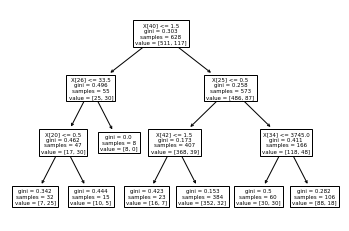

In [52]:
tree.plot_tree(clf);

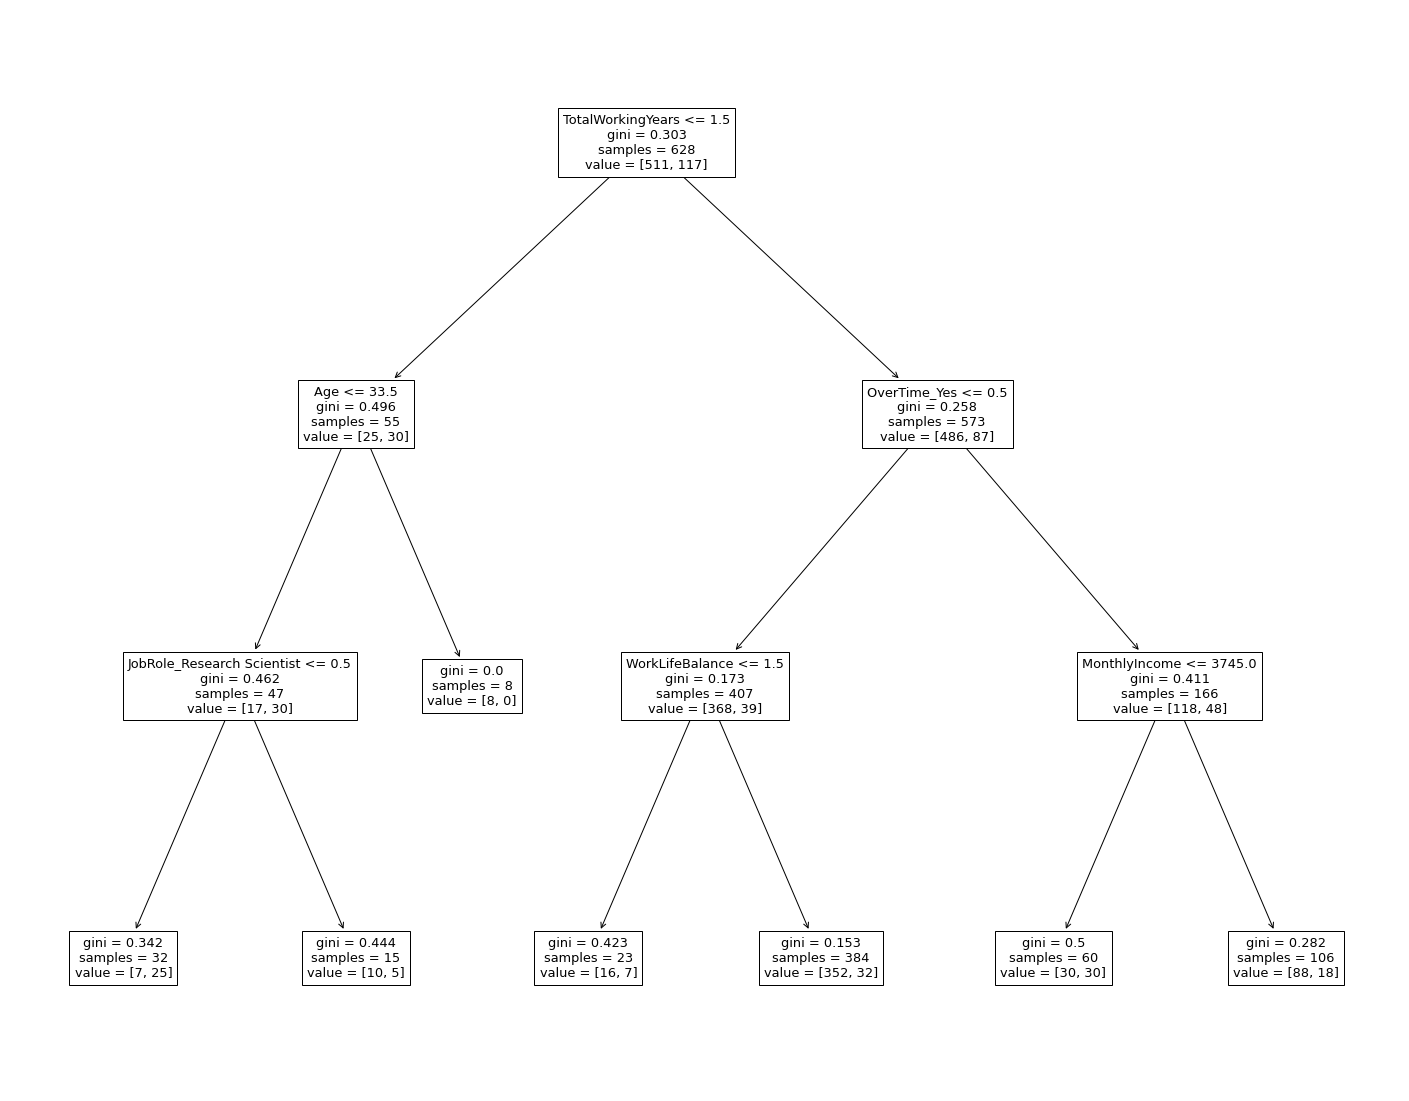

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X_train.columns)

In [54]:
#do after i transform test data
#y_pred = clf.predict(X_test)
#print('MSE score:', mse(y_test, y_pred))
#print('R-sq score:', r2_score(y_test,y_pred))

In [55]:
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr = clf.fit(X_train, y_train)

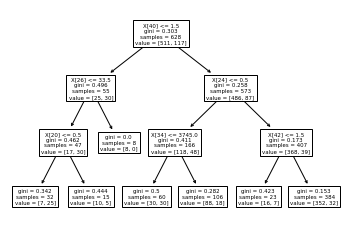

In [56]:
tree.plot_tree(dtr);

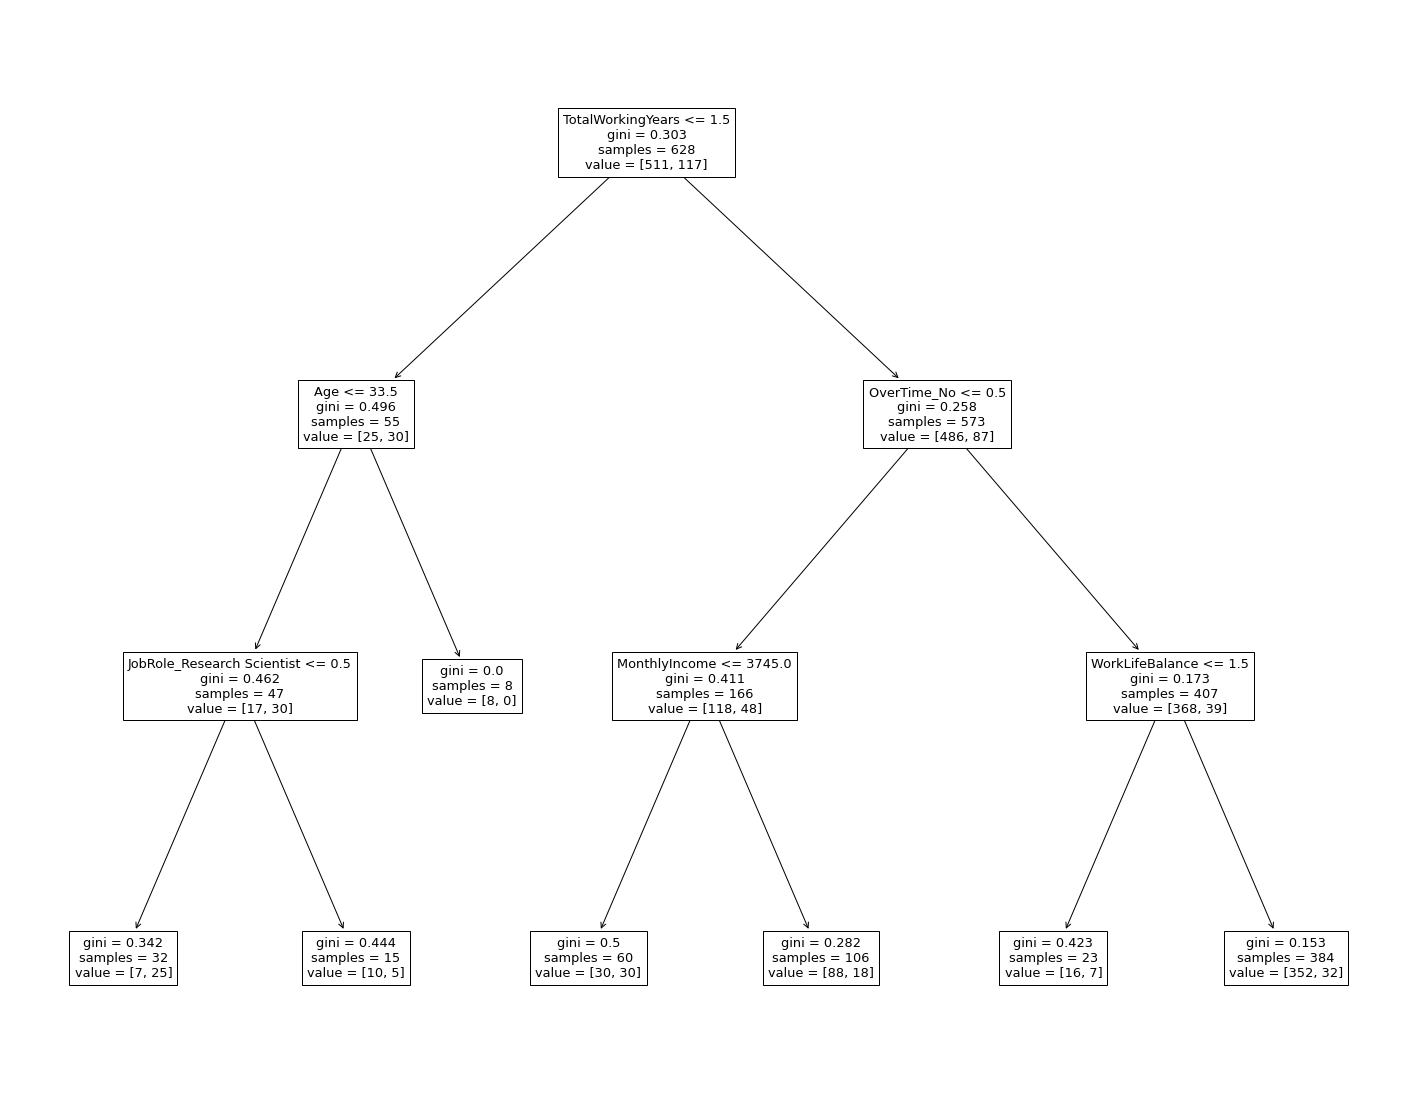

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, feature_names=X_train.columns)

In [110]:
#X_train_transformed = mini_pipe.fit_transform(X_train)
lg = LogisticRegression(random_state=42)

#X_train_transformed

In [111]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [119]:
lg.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [120]:
y_pred = lg.predict(X_test_transformed)

In [121]:
lg.score(X_train_transformed, y_train)

0.8795986622073578

In [122]:
cv_scores = cross_val_score(lg, X_train_transformed, y_train, scoring = 'roc_auc', cv=3)
cv_scores

array([0.81757635, 0.82984636, 0.79437725])

In [123]:
print("Model: Original CLF Depth 5")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

Model: Original CLF Depth 5
Accuracy score: 0.8581081081081081
________________________________________________________________________________
 
              precision    recall  f1-score   support

          No       0.88      0.95      0.92       240
         Yes       0.69      0.45      0.54        56

    accuracy                           0.86       296
   macro avg       0.79      0.70      0.73       296
weighted avg       0.85      0.86      0.85       296




data wrangle - data definitions 

eda and descriptive stats end of phase 1 beg of phase 2

preprocessing and transform pipeline and could save pickle object 

modeling discussion 

In [67]:
# change object to category to pass into decision tree 

In [68]:
#possible outliers, try only running numeric columns

In [69]:
cleaned_df = df.select_dtypes(include=np.number)

In [70]:
cleaned_df

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,2,2,3,2,4,5993,8,11,1,0,8,0,1,6,4,0,5
1,49,0,8,1,3,2,2,2,5130,1,23,4,1,10,3,3,10,7,1,7
2,37,1,2,2,4,2,1,3,2090,6,15,2,0,7,3,3,0,0,0,0
3,33,0,3,4,4,3,1,3,2909,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,1,3,1,2,3468,9,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,0,5,3,4,2,1,3,2966,0,18,4,0,5,2,3,4,2,0,0
1465,36,0,23,2,3,4,2,4,2571,4,17,3,1,17,3,3,5,2,0,3
1467,27,0,4,3,2,4,2,2,6142,1,20,2,1,6,0,3,6,2,0,3
1468,49,0,2,3,4,2,2,2,5390,2,14,4,0,17,3,2,9,6,0,8


In [71]:
#train_numeric_cols = X_train.select_dtypes(include=np.number)
#train_categorical_cols = X_train.select_dtypes(include=['object'])

In [72]:
cleaned_df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MaritalStatus', 'MonthlyRate',
                              'PerformanceRating', 'BusinessTravel', 'Department', 'EducationField',
                              'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

KeyError: "['DailyRate' 'EmployeeNumber' 'HourlyRate' 'MaritalStatus' 'MonthlyRate'\n 'PerformanceRating' 'MaritalStatus'] not found in axis"

In [ ]:
y = cleaned_df['Attrition']
X = cleaned_df.drop(columns=['Attrition'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
lg = LogisticRegression(random_state=42)

In [ ]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

In [ ]:
lg.fit(X_train_transformed, y_train)

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
lg.score(X_train_transformed, y_train)

In [ ]:
cv_scores = cross_val_score(lg, X_train_transformed, y_train, scoring = 'roc_auc', cv=3)
cv_scores

In [ ]:
print("Model: Original CLF Depth 5")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

In [ ]:
y_test

In [ ]:
y_pred